# EXAMEN SEGUNDO PARCIAL

**Larissa Rodríguez Millán**

### Dataset de Coactivation matrixtaset

- Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)- 
Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en este dataset

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.mixture import GaussianMixture
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category = UserWarning)

ruta_del_archivo = r"C:\Users\laris\OneDrive\Documentos\LNC\Modeloscomputacionales\Modelos-de-Larissa\PROYECTO FINAL_LARISSA\Coactivation_matrix.mat"
data = loadmat(ruta_del_archivo)

In [31]:
print("Claves en el archivo:", data.keys())

Claves en el archivo: dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])


In [33]:
coactivation_matrix = data['Coactivation_matrix']

df = pd.DataFrame(coactivation_matrix)

print(df.head())

        0         1         2         3         4    5         6         7    \
0  0.000000  0.160714  0.111486  0.000000  0.138095  0.0  0.000000  0.000000   
1  0.160714  0.000000  0.068259  0.000000  0.042056  0.0  0.000000  0.000000   
2  0.111486  0.068259  0.000000  0.224199  0.000000  0.0  0.000000  0.052846   
3  0.000000  0.000000  0.224199  0.000000  0.000000  0.0  0.039275  0.048035   
4  0.138095  0.042056  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   

   8         9    ...  628       629  630  631       632       633       634  \
0  0.0  0.034351  ...  0.0  0.000000  0.0  0.0  0.157676  0.053872  0.049383   
1  0.0  0.036585  ...  0.0  0.000000  0.0  0.0  0.119149  0.042105  0.000000   
2  0.0  0.000000  ...  0.0  0.047035  0.0  0.0  0.000000  0.161905  0.103943   
3  0.0  0.000000  ...  0.0  0.048673  0.0  0.0  0.000000  0.000000  0.075697   
4  0.0  0.000000  ...  0.0  0.000000  0.0  0.0  0.066079  0.000000  0.000000   

        635       636       637  
0  0

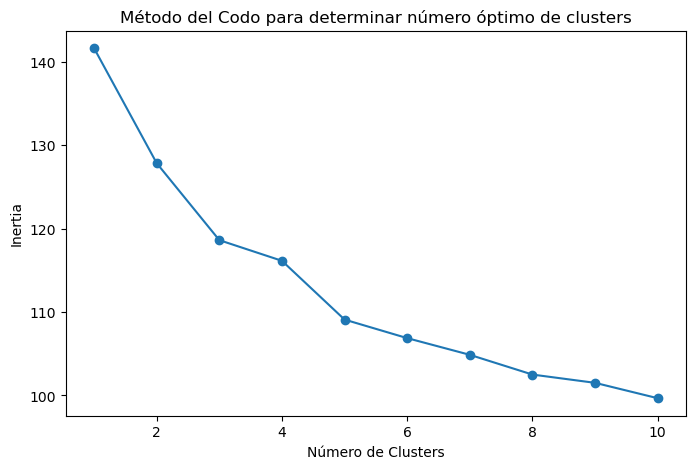

In [35]:
# Calcular la "inertia" para diferentes números de clusters
inertias = []
K_range = range(1, 11) 
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)  
    inertias.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método del Codo para determinar número óptimo de clusters')
plt.show()

In [49]:
# K-MEANS 
from sklearn.preprocessing import StandardScaler
df.columns = df.columns.astype(str)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_std = pd.DataFrame(scaled_data, columns=[f'Feature{i+1}' for i in range(df.shape[1])])

In [55]:
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df)  
df_std['KMeans_Cluster'] = kmeans_labels


<Axes: xlabel='Feature1', ylabel='Feature2'>

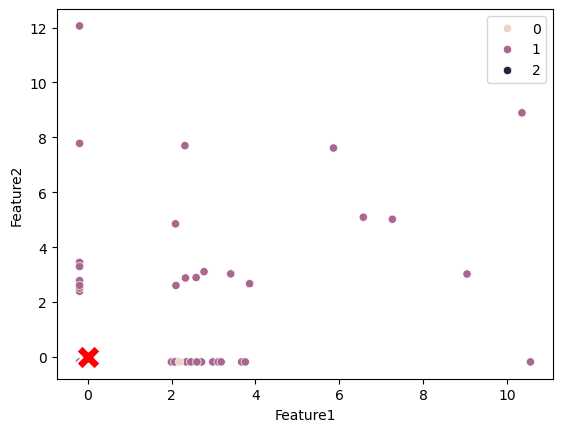

In [57]:
sns.scatterplot(data=df_std, x='Feature1', y='Feature2', hue='KMeans_Cluster')
sns.scatterplot(x=kmeans.cluster_centers_[:, 1], y=kmeans.cluster_centers_[:, 0], 
                marker="X", color='r', s=300)


<Axes: xlabel='Feature1', ylabel='Feature2'>

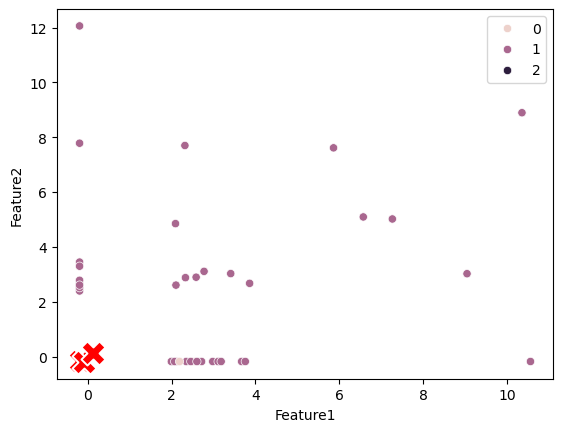

In [61]:
no_clusters = 5
kmeans = KMeans(n_clusters=no_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
df_std['kmeans'] = kmeans_labels

sns.scatterplot(data=df_std, x='Feature1', y='Feature2', hue='KMeans_Cluster')
sns.scatterplot(x=kmeans.cluster_centers_[:, 1], y=kmeans.cluster_centers_[:, 0], 
                marker="X", color='r', s=300)


In [65]:
# GAUSSIAN MIXTURE MODEL

from sklearn.mixture import GaussianMixture
df.columns = df.columns.astype(str)
print(df.columns)

optimal_k = 3  
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(df) 
df['GMM_Cluster'] = gmm_labels  

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '630', '631', '632', '633', '634', '635', '636', '637',
       'KMeans_Cluster', 'GMM_Cluster'],
      dtype='object', length=640)


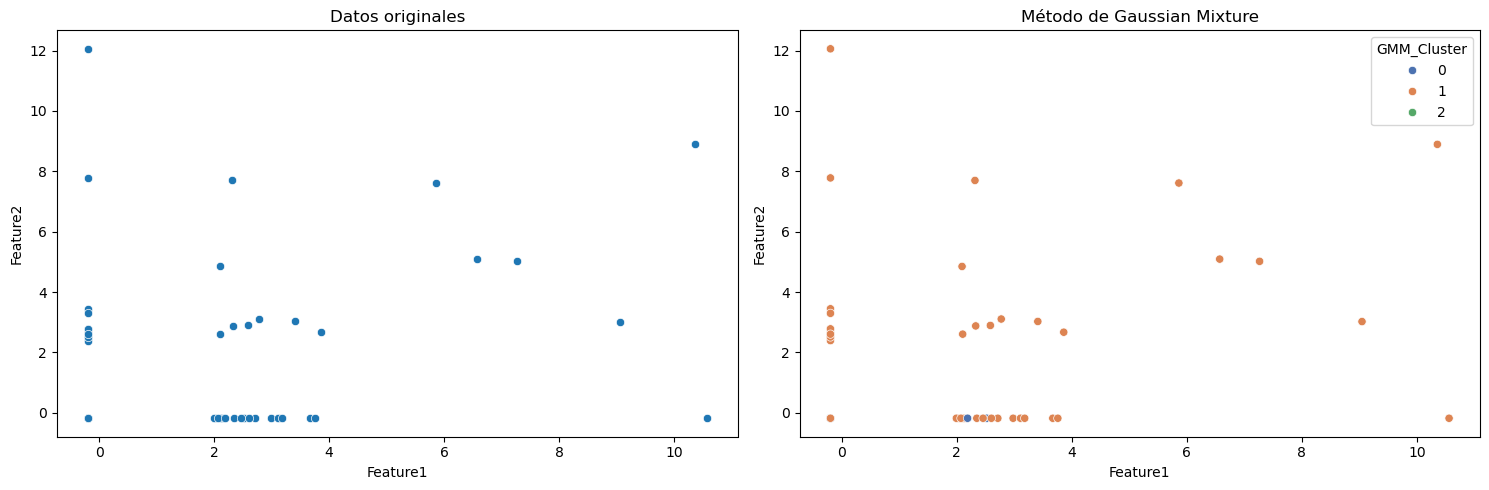

In [67]:
df_std['GMM_Cluster'] = gmm_labels
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=df_std, x='Feature1', y='Feature2', ax=axes[0]).set_title('Datos originales')


sns.scatterplot(data=df_std, x='Feature1', y='Feature2', hue='GMM_Cluster', palette='deep', ax=axes[1]).set_title('Método de Gaussian Mixture')

plt.tight_layout()
plt.show()

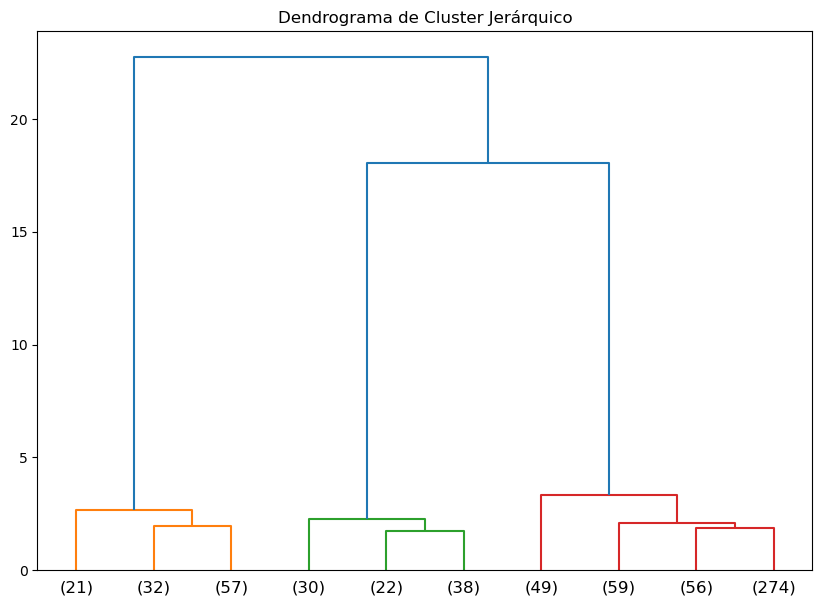

In [51]:
# CLUSTER JERÁRQUICO 
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10)  # Visualizar los últimos clusters
plt.title('Dendrograma de Cluster Jerárquico')
plt.show()

### Brain Tumor 

- Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
- Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth
- ¿Qué método recomendarías para este dataset?, ¿por qué?

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score


# Cargar el dataset
df_btumor = pd.read_csv(r"C:\Users\laris\OneDrive\Documentos\LNC\Modeloscomputacionales\archive2\Brain Tumor.csv")

# Ver primeras filas para exploración
df_btumor.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


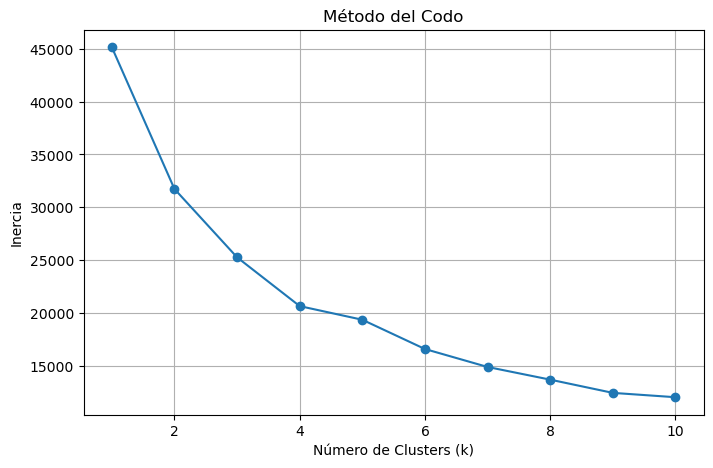

In [80]:
y_true = df_btumor['Class']
X = df_btumor.drop(columns=['Class'])
features = df_btumor.drop(columns=["Image", "Class", "Coarseness"])

# Escalar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Método del codo
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

In [82]:
# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

In [84]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(scaled_features)

In [88]:
# Clustering Jerárquico
from scipy.cluster.hierarchy import linkage, fcluster

hierarchical = linkage(scaled_features, method='ward')
hierarchical_labels = fcluster(hierarchical, t=2, criterion='maxclust')
hierarchical_labels = hierarchical_labels - 1

In [94]:
# Matriz de confusión
true_labels = ['Clase 0', 'Clase 1'] 
predicted_labels = ['Cluster 0', 'Cluster 1']  

cm_kmeans = pd.DataFrame(confusion_matrix(df_btumor['Class'], kmeans_labels), 
                         index=true_labels, columns=predicted_labels)

cm_gauss = pd.DataFrame(confusion_matrix(df_btumor['Class'], gmm_labels), 
                        index=true_labels, columns=predicted_labels)

cm_hierarchical = pd.DataFrame(confusion_matrix(df_btumor['Class'], hierarchical_labels), 
                               index=true_labels, columns=predicted_labels)

print("Matriz de Confusión K-Means:\n", cm_kmeans)
print("Matriz de Confusión Gaussian Mixture:\n", cm_gauss)
print("Matriz de Confusión Clustering Jerárquico:\n", cm_hierarchical)

Matriz de Confusión K-Means:
          Cluster 0  Cluster 1
Clase 0       1978        101
Clase 1         80       1603
Matriz de Confusión Gaussian Mixture:
          Cluster 0  Cluster 1
Clase 0       2056         23
Clase 1         60       1623
Matriz de Confusión Clustering Jerárquico:
          Cluster 0  Cluster 1
Clase 0       2053         26
Clase 1         94       1589


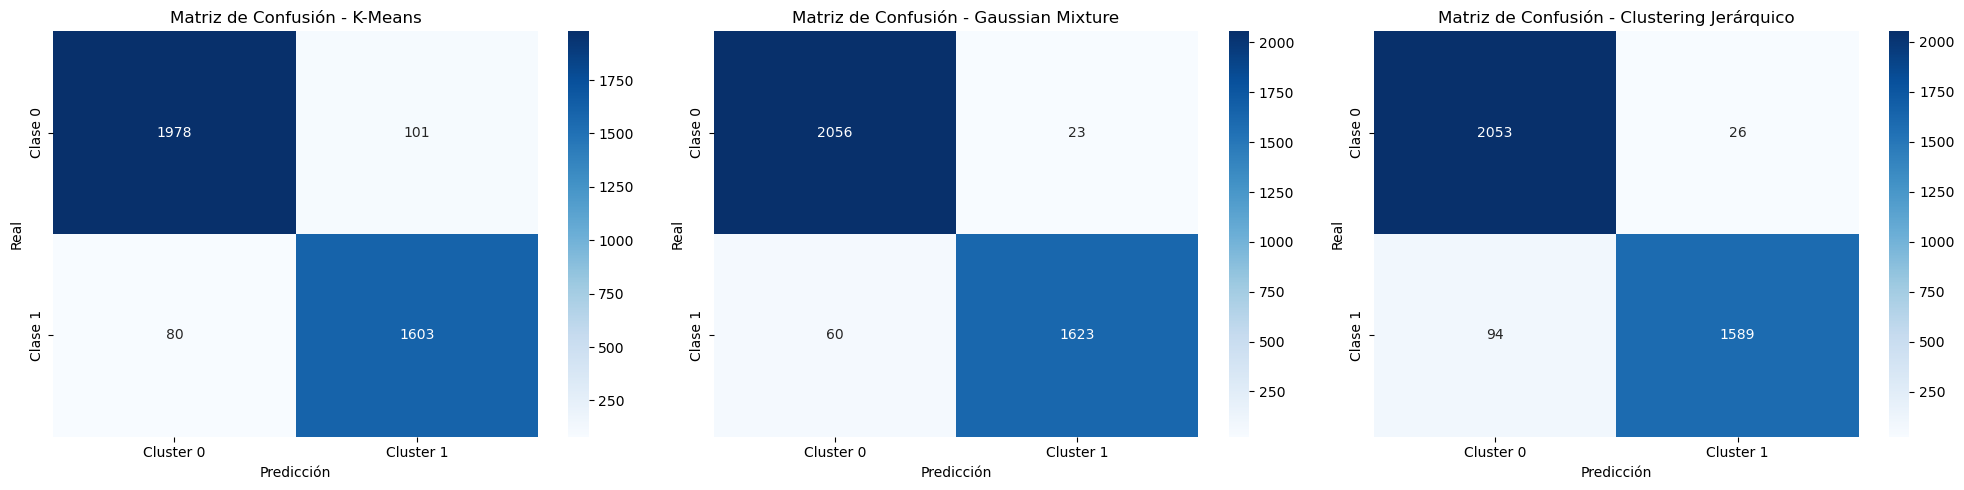

In [96]:

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Matriz de Confusión - K-Means
sns.heatmap(cm_kmeans, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["Clase 0", "Clase 1"], ax=axes[0])
axes[0].set_title("Matriz de Confusión - K-Means")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

# Matriz de Confusión - Gaussian Mixture
sns.heatmap(cm_gauss, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["Clase 0", "Clase 1"], ax=axes[1])
axes[1].set_title("Matriz de Confusión - Gaussian Mixture")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

# Matriz de Confusión - Clustering Jerárquico
sns.heatmap(cm_hierarchical, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["Clase 0", "Clase 1"], ax=axes[2])
axes[2].set_title("Matriz de Confusión - Clustering Jerárquico")
axes[2].set_xlabel("Predicción")
axes[2].set_ylabel("Real")

plt.tight_layout()
plt.show()


**¿Qué método recomendaría para este dataset?**

Recomendaría pobar primero con GMM por la flexibilidad que tiene al momento de formar los clsuters, que no solo arroja la clase sino también la probabilidad de que un punto pertenezca a un cluster, lo cual es bastante útil en este tipo de datos médicos donde ppuede haber mucha incertidumbre; también creo que hay mejor adaptación a datos reales. 


### De su previa investigación: 

- ¿Qué es precision?
- ¿Qué es accuracy?
- ¿Qué es recall?
- ¿Qué es f1-score?

**Precisión**: Es la proporción de verdaderos positivos entre todos los elementos que el modelo clasificó como positivos. En palabras simples, mide qué tan precisas son las predicciones positivas del modelo. La fórmula es: $$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

**Exactitud**: Es la proporción de predicciones correctas (tanto positivas como negativas) sobre el total de predicciones. Mide qué tan correcto es el modelo en general. La fórmula es: $$\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total de Casos}}$$

**Recall**: Es la proporción de verdaderos positivos entre todos los elementos que realmente son positivos. Indica qué tan bien el modelo detecta los casos positivos. Su fórmula es: $$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

**F1-Score**: Es la media armónica de la precisión y el recall. Se utiliza cuando se busca un balance entre ambos, especialmente si hay un desbalance en las clases (cuando una clase es mucho más común que la otra). La fórmula es: $$\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

### ¿Cómo se relacionan las definiciones anteriores a la matriz de confusión?

La matriz de confusión proporciona los valores enecsarios para las métricas anteriores, es una tabla que muestra los resultados de clasificación de un modelo. Inlcuye: 

**- True Positives (TP)**: Casos positivos correctamente clasificados por el modelo.

**- True Negatives (TN)**: Casos negativos correctamente clasificados.

**- False Positives (FP)**: Casos negativos que el modelo clasificó como positivos (falsos alarmas).

**- False Negatives (FN)**: Casos positivos que el modelo clasificó como negativos (errores por omisión).

Precision: Usa TP y FP. Se enfoca en los positivos predichos.

Accuracy: Considera todos los valores de la matriz (TP, TN, FP y FN). Mide la proporción total de clasificaciones correctas.

Recall: Usa TP y FN. Se centra en los casos positivos reales.

F1-Score: Combina precision y recall mediante su media armónica, y por lo tanto utiliza TP, FP y FN.

### A partir del resultado de 2.B, calcular precision, accuracy, recall y f1-score

In [99]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

def evaluar_clusters(y_true, labels, metodo):
    # Calcular las métricas
    precision = precision_score(y_true, labels, average='weighted')
    accuracy = accuracy_score(y_true, labels)
    recall = recall_score(y_true, labels, average='weighted')
    f1 = f1_score(y_true, labels, average='weighted')

    # Imprimir los resultados
    print(f"Resultados del método: {metodo}")
    print(f"Precision: {precision:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("-" * 30)


# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
evaluar_clusters(y_true, kmeans_labels, "K-Means")

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(scaled_features)
evaluar_clusters(y_true, gmm_labels, "GMM")

# Clustering Jerárquico
hierarchical = AgglomerativeClustering(n_clusters=2)
hier_labels = hierarchical.fit_predict(scaled_features)
evaluar_clusters(y_true, hier_labels, "Jerárquico")


Resultados del método: K-Means
Precision: 0.95
Accuracy: 0.95
Recall: 0.95
F1-Score: 0.95
------------------------------
Resultados del método: GMM
Precision: 0.98
Accuracy: 0.98
Recall: 0.98
F1-Score: 0.98
------------------------------
Resultados del método: Jerárquico
Precision: 0.03
Accuracy: 0.03
Recall: 0.03
F1-Score: 0.03
------------------------------
